In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

We'll be using Faster R-CNN

In [2]:
from torchvision.models.detection.faster_rcnn import fasterrcnn_resnet50_fpn
import torch

In [3]:
# load the pretrained model
model = fasterrcnn_resnet50_fpn(pretrained=True).eval()

Just googled a random image of a crowded street.

In [ ]:
! wget https://www.nrn.com/sites/nrn.com/files/styles/article_featured_standard/public/busy-new-york-city-street.jpg -O street.jpg

In [7]:
import imageio

img = imageio.imread('street.jpg')
img = img / img.max()

In [13]:
img.shape

(400, 770, 3)

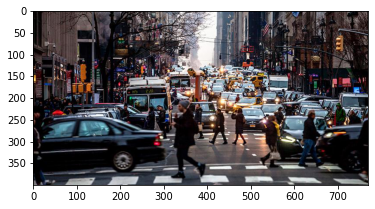

In [8]:
plt.imshow(img)

In [14]:
pred = model([torch.from_numpy(np.moveaxis(img.astype('float32'), -1, 0))])[0]

In [15]:
pred.keys()

dict_keys(['boxes', 'labels', 'scores'])

In [19]:
from matplotlib.patches import Rectangle

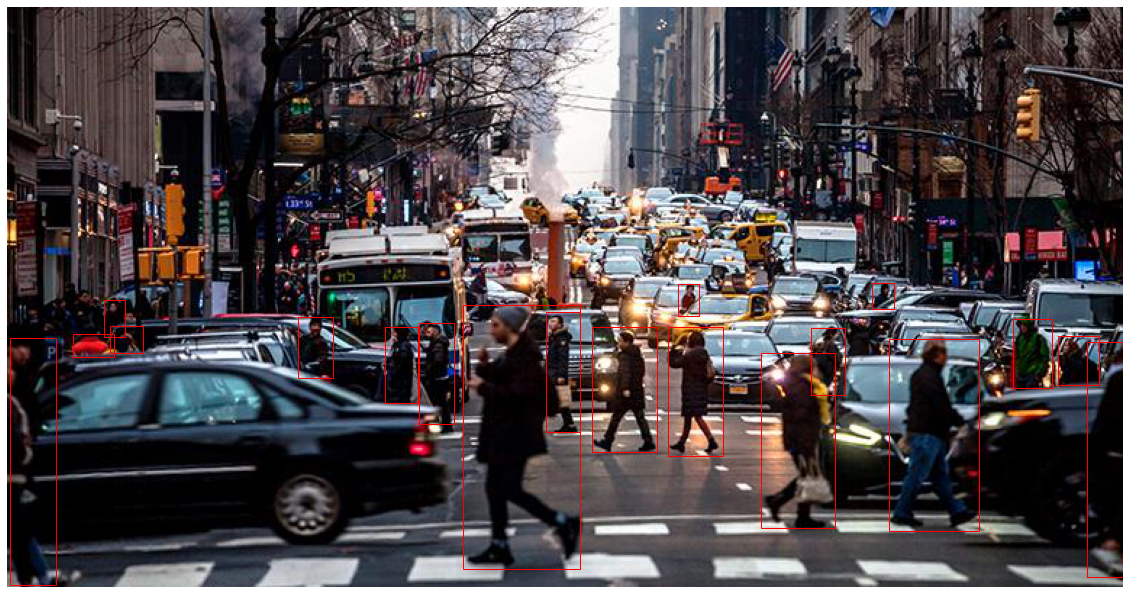

In [29]:
fig, ax = plt.subplots(1, figsize=(20, 20))
plt.imshow(img)
plt.axis('off')

for box, label, score in zip(pred['boxes'], pred['labels'], pred['scores']):
    if label == 1 and score >= 0.5:
        start = box[:2]
        stop = box[2:]
        
        ax.add_patch(Rectangle(start, *stop - start, facecolor='none', edgecolor='r'))

In [26]:

pred['scores']

tensor([0.9991, 0.9982, 0.9971, 0.9968, 0.9965, 0.9944, 0.9884, 0.9881, 0.9698,
        0.9344, 0.9196, 0.9193, 0.9164, 0.9123, 0.8992, 0.8972, 0.8940, 0.8870,
        0.8858, 0.8837, 0.8730, 0.8683, 0.8650, 0.8600, 0.8528, 0.8487, 0.8455,
        0.8364, 0.8158, 0.8088, 0.8068, 0.8064, 0.7579, 0.7505, 0.6398, 0.6363,
        0.6118, 0.5944, 0.5846, 0.5827, 0.5547, 0.5453, 0.5400, 0.5391, 0.5357,
        0.5315, 0.5051, 0.4921, 0.4861, 0.4840, 0.4678, 0.4575, 0.4319, 0.4135,
        0.4111, 0.4077, 0.4053, 0.4042, 0.3958, 0.3894, 0.3855, 0.3827, 0.3782,
        0.3759, 0.3681, 0.3644, 0.3589, 0.3570, 0.3549, 0.3522, 0.3504, 0.3481,
        0.3381, 0.3334, 0.3280, 0.3180, 0.3134, 0.3129, 0.3126, 0.3045, 0.2902,
        0.2711, 0.2702, 0.2550, 0.2536, 0.2531, 0.2357, 0.2335, 0.2313, 0.2289,
        0.2235, 0.2202, 0.2184, 0.2094, 0.2022, 0.2010, 0.1992, 0.1968, 0.1937,
        0.1907], grad_fn=<IndexBackward>)